In [8]:
import math
from typing import Tuple, Union

from deskew import determine_skew
import cv2
import numpy as np

import matplotlib.pyplot as plt


Found angle: -0.5027932960893935


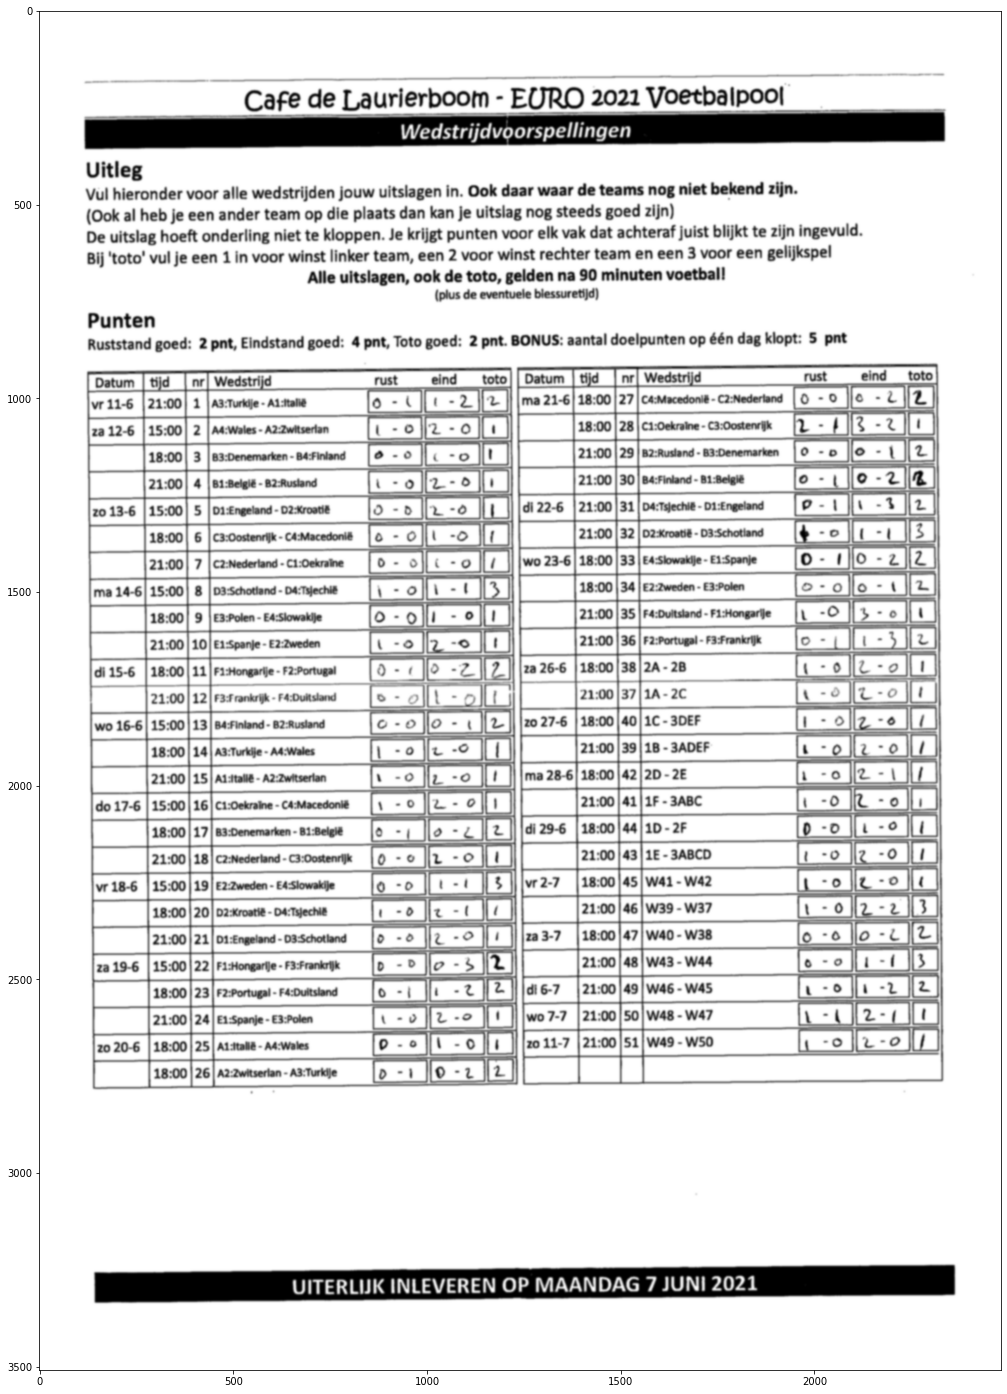

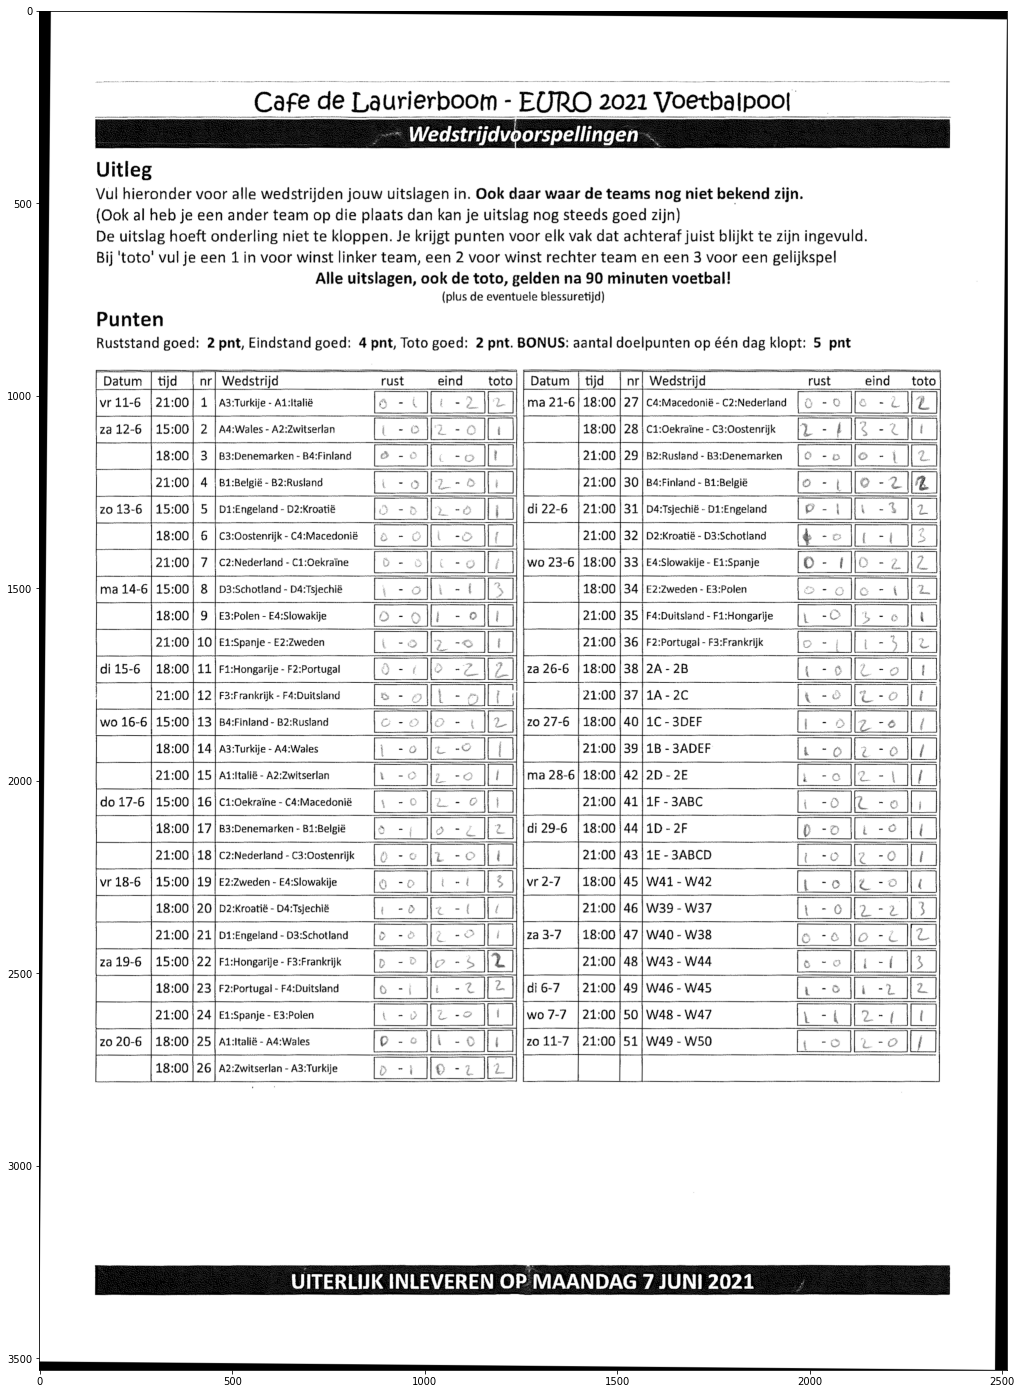

True

In [93]:
def rotate(
        image: np.ndarray, angle: float, background: Union[int, Tuple[int, int, int]]
) -> np.ndarray:
    old_width, old_height = image.shape[:2]
    angle_radian = math.radians(angle)
    width = abs(np.sin(angle_radian) * old_height) + abs(np.cos(angle_radian) * old_width)
    height = abs(np.sin(angle_radian) * old_width) + abs(np.cos(angle_radian) * old_height)

    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    rot_mat[1, 2] += (width - old_width) / 2
    rot_mat[0, 2] += (height - old_height) / 2
    return cv2.warpAffine(image, rot_mat, (int(round(height)), int(round(width))), borderValue=background)

image = cv2.imread('/home/dan/Downloads/poulespng/poule-80.pdf.png', cv2.IMREAD_UNCHANGED)
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
th, thresh = cv2.threshold(grayscale, 250, 255, cv2.THRESH_BINARY)
blur = cv2.GaussianBlur(thresh, (13,13), 0)
# th, blur = cv2.threshold(blur, 250, 255, cv2.THRESH_BINARY)


working_image = blur

cv2.imwrite('grayscale.png', grayscale)
cv2.imwrite('blur.png', blur)
cv2.imwrite('thresh.png', thresh)

angle = determine_skew(working_image)

if (angle < -90): angle = angle + 90

print(f"Found angle: {angle}")
rotated = rotate(image, angle, (0, 0, 0))

plt.figure(figsize=(25, 25))
plt.imshow(cv2.cvtColor(working_image, cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(figsize=(25, 25))
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('rotated.png', rotated)